# Primer Analysis

In [1]:
import pandas as pd
import dms_tools2
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils import MeltingTemp as mt

from plotnine import *
%matplotlib inline

Start by reading in csv's of primers generated by TargetedTilingPrimers, and concat into a single df

In [18]:
hk19_primers = pd.read_csv('results/hk19_primers.csv', header=None)
hk19_primers.columns = ['name', 'primer']
hk19_primers['gene'] = 'hk19'

ks17_primers = pd.read_csv('results/ks17_primers.csv', header=None)
ks17_primers.columns = ['name', 'primer']
ks17_primers['gene'] = 'ks17'

primers_df = pd.concat([ks17_primers, hk19_primers], ignore_index=True)
primers_df

,name,primer,gene
0,ks17-for-mut1A,gacacacagaagGCACCTGGAAATGACA,ks17
1,ks17-for-mut1D,cagacacacagaagGATCCTGGAAATGACAAT,ks17
2,ks17-for-mut1E,cagacacacagaagGAACCTGGAAATGACAAT,ks17
3,ks17-for-mut1F,gcagacacacagaagTTTCCTGGAAATGACAATA,ks17
4,ks17-for-mut1G,gacacacagaagGGACCTGGAAATGACA,ks17
...,...,...,...
10015,hk19-rev-mut502S,gacttcagctcaacTGACTTGATCTGGAACC,hk19
10016,hk19-rev-mut502T,gacttcagctcaacTGTCTTGATCTGGAACC,hk19
10017,hk19-rev-mut502V,acttcagctcaacCACCTTGATCTGGAAC,hk19
10018,hk19-rev-mut502W,acttcagctcaacCCACTTGATCTGGAAC,hk19


Calculate Tm and length for each primer in the list

In [6]:
seq = 'CTCAtTaTatAcaGatGtTgcaTCgGaTGTTGcc'
print('%0.2f' % mt.Tm_NN(seq, strict=False))

59.79


In [46]:
primers_df['Tm'] = primers_df.apply(lambda x: '%0.2f' % mt.Tm_NN(x.primer, strict=False), axis=1)
primers_df['Tm'] = primers_df['Tm'].astype('float')
primers_df['length'] = primers_df.apply(lambda x: len(x.primer), axis=1)
primers_df

,name,primer,gene,Tm,length
0,ks17-for-mut1A,gacacacagaagGCACCTGGAAATGACA,ks17,60.98,29
1,ks17-for-mut1D,cagacacacagaagGATCCTGGAAATGACAAT,ks17,60.39,33
2,ks17-for-mut1E,cagacacacagaagGAACCTGGAAATGACAAT,ks17,60.70,33
3,ks17-for-mut1F,gcagacacacagaagTTTCCTGGAAATGACAATA,ks17,60.88,35
4,ks17-for-mut1G,gacacacagaagGGACCTGGAAATGACA,ks17,60.32,29
...,...,...,...,...,...
10015,hk19-rev-mut502S,gacttcagctcaacTGACTTGATCTGGAACC,hk19,60.81,32
10016,hk19-rev-mut502T,gacttcagctcaacTGTCTTGATCTGGAACC,hk19,60.81,32
10017,hk19-rev-mut502V,acttcagctcaacCACCTTGATCTGGAAC,hk19,60.56,30
10018,hk19-rev-mut502W,acttcagctcaacCCACTTGATCTGGAAC,hk19,60.56,30


Start by plotting spread of primer length

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/primer_length_dist.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


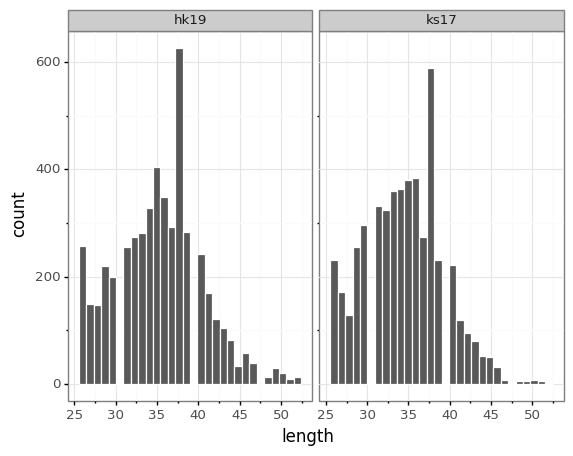

<bound method ggplot.draw of <ggplot: (8792106339813)>>

In [68]:
p = (ggplot(primers_df) + 
     aes('length') + 
     geom_histogram(color='white',bins=30) + 
     facet_wrap('gene')  
    )

ggsave(plot = p, filename = 'results/primer_length_dist.png')
p.draw

This looks pretty good to me. There's a high peak at 37bp, which is the default primer length. Primers skew shorter than 37bp rather than longer. There is an accumulation of primers at 25bp, which is the minimum length, and may indicate that I have a number of primers with a Tm above the target max of 61C. 

Plot the Tms to analyze spread here:

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/primer_tm_dist.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


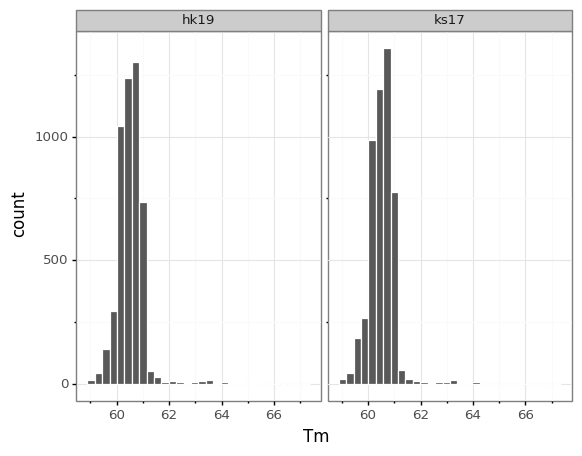

<bound method ggplot.draw of <ggplot: (8792105828389)>>

In [69]:
p = (ggplot(primers_df) + 
     aes('Tm') + 
     geom_histogram(color='white', bins=30) + 
     facet_wrap('gene')  
    )

ggsave(plot = p, filename = 'results/primer_tm_dist.png')
p.draw

This mostly looks good, except that there may be a primer with a Tm of ~68? Check the highest Tm value:

In [64]:
primers_df_ks17 = primers_df[primers_df['gene'] == 'ks17'].reset_index()
primers_df_ks17.iloc[(primers_df_ks17['Tm'].idxmax())]

index                            159
name                 ks17-for-mut13V
primer     CAACGCTGTGCGTGGGGCACCATGC
gene                            ks17
Tm                             67.09
length                            26
Name: 159, dtype: object

In [65]:
primers_df_hk19 = primers_df[primers_df['gene'] == 'hk19'].reset_index()
primers_df_hk19.iloc[(primers_df_hk19['Tm'].idxmax())]

index                           5169
name                 hk19-for-mut13V
primer     CAACGCTGTGCGTGGGGCACCATGC
gene                            hk19
Tm                             67.09
length                            26
Name: 159, dtype: object

So this mutation 13V might not work out, but I'm not too worried about missing out on a single mutation. Apart from this extreme outlier, most of the other primers are in a reasonable Tm range, and even the handful up at ~63C should be fine. 

Lastly, output in the correct format for IDT oPools ordering sheet

In [2]:
hk19_primers = pd.read_csv('results/hk19_primers.csv', header=None)
hk19_primers.columns = ['Pool_name', 'Sequence']

ks17_primers = pd.read_csv('results/ks17_primers.csv', header=None)
ks17_primers.columns = ['Pool_name', 'Sequence']

In [4]:
hk19_opool = hk19_primers.replace(regex=[r'(?<=hk19-for).*', r'(?<=hk19-rev).*'], value='-pool')
ks17_opool = ks17_primers.replace(regex=[r'(?<=ks17-for).*', r'(?<=ks17-rev).*'], value='-pool')
opools = pd.concat([hk19_opool, ks17_opool])

opools = opools.replace(regex=[r'-'], value='_')

# make sure that there are no spaces
opools.Sequence = opools.Sequence.str.replace(' ', '')

opools.to_csv('results/targeted_mutations_opools.csv', index=False)
opools

,Pool_name,Sequence
0,hk19_for_pool,gacacacagaagGCACCTGGAAATGACA
1,hk19_for_pool,cagacacacagaagGATCCTGGAAATGACAAT
2,hk19_for_pool,cagacacacagaagGAACCTGGAAATGACAAT
3,hk19_for_pool,gcagacacacagaagTTTCCTGGAAATGACAATA
4,hk19_for_pool,gacacacagaagGGACCTGGAAATGACA
...,...,...
5005,ks17_rev_pool,gacttcagctcaacTGACTTGATCTGGAACC
5006,ks17_rev_pool,gacttcagctcaacTGTCTTGATCTGGAACC
5007,ks17_rev_pool,acttcagctcaacCACCTTGATCTGGAAC
5008,ks17_rev_pool,acttcagctcaacCCACTTGATCTGGAAC
